In [ ]:
import xgboost


xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

XGBoost also offers several nice features, such as automatically taking care of early
stopping:
    

In [ ]:
xgb_reg.fit(X_train, y_train,
            eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)

# XGBoost Trees for Regression

XGboost is a big Machine Learning algorithm with lots of parts.

    - Gradient Boost
    
    - Regularization
    
    - An Unique Regression Tree
    
    - Approximate Greedy Algorithm
    
    - Weighted Quantile Skecth
    
    - Sparsity-Aware Split Finding
    
    - Parallel Learning
    
    - Cache-Aware Access
    
    - Blocks for Out-of-Core Computation

XGBoost was designed to be used with large, complicated datasets. For this example, we will use a very simple dataset.

<div>
    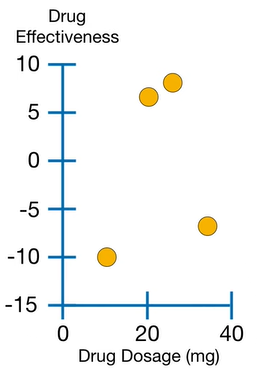
</div>

The initial step is to make an initial prediction:

<div>
    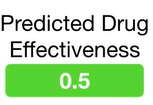
</div>

by default it is 0.5, regardless of whether we are using XGBoost for Regression or Classification.

<div>
    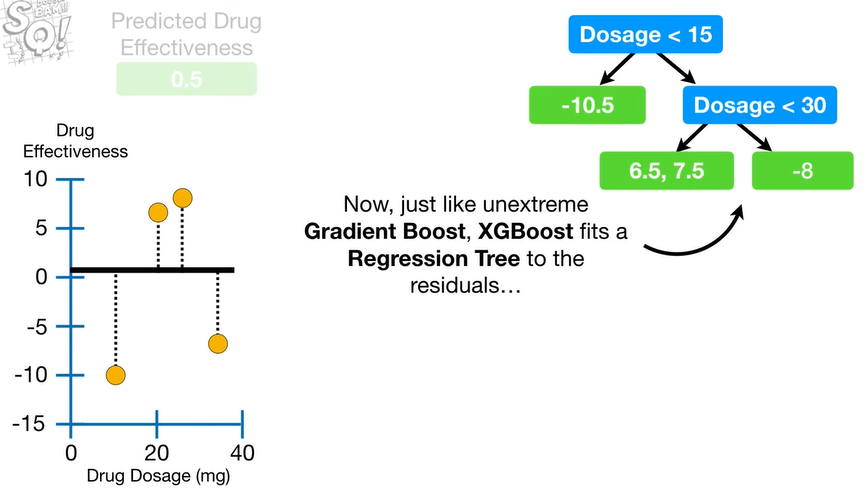
</div>

But unlike Grradient Boost, which uses regular Regression Trees, XGB uses a unique Regression Tree

### An Unique Regression Tree

#### 1) Each leaf starts as a single leaf, and all the residuals go into it

<div>
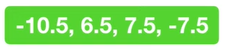
</div>
Now, a _Quality Score_ or _Similiraty Score_ is calculated for the Residuals $$Similarity Score = \frac{(\sum Residuals)^{2}}{n_{Residuals}+\lambda}$$


Where $\lambda$ is a regularization parameters &rarr; reduces sensitivity to individual observations. It penalizes leaves with less residuals.
 
#### 2) Then, we analyze if we can do a better job clustering similar Residuals if we split them into two groups

To each pair of samples in ascending order we calculate their average (the threshold), and see how well it splits the data, calculating the similarity of the new build leaves.

When the residuals in a node are very different, they cancel each other out <b>And the Similarity Score is relatively small</b>. In contrast, if the residuals are similar, or there is just one of them, they do not cancel out, <b>and the Similarity  Score is relatively large.</b>

<div>
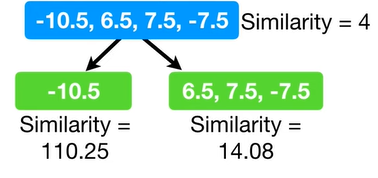
</div>

#### 3) Now, we need to quantify how much better the leaves cluster similar residuals than the root &rarr; Gain $$Gain = Left_{Similarity}+Right_{Similarity}-Root_{Similarity}$$
 
#### 4) Now, calculate the Gain to other thresholds, picking the one with highest Gain.
 
<div>
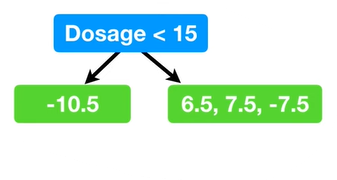
</div>

For the next leaves, we do the same things, except that the starting tried threshold will be the next pair after the previous split, and do it untill we cannot improve the Gain anymore, or we reached the maximum level of the tree (usually up to 6)


<div>
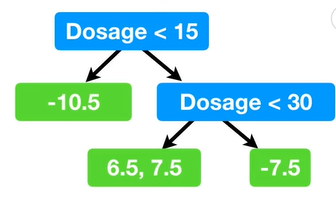
</div>

#### 5) Now, we _Prune_ this tree
 
 We prune an XGBoost Tree based on its Gain values. We start with a $\gamma$ number. We then calculate the difference between the Gain associated with the lowest branch in the tree and $\gamma$ &rarr; if the difference is negative, we remove the branch.
 
 <div>
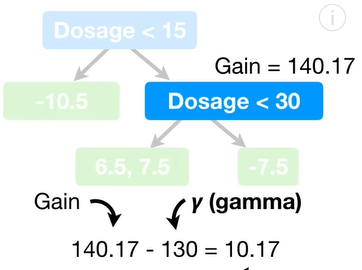
</div>

In this example, the difference is positive, so we will not prune the tree.

Note: if the difference between the node gains and gamma remains negative up to the root, the tree is removed, and we simply end with the initial prediction, 0.5

#### The $\gamma$ hyperparameter

<div>
    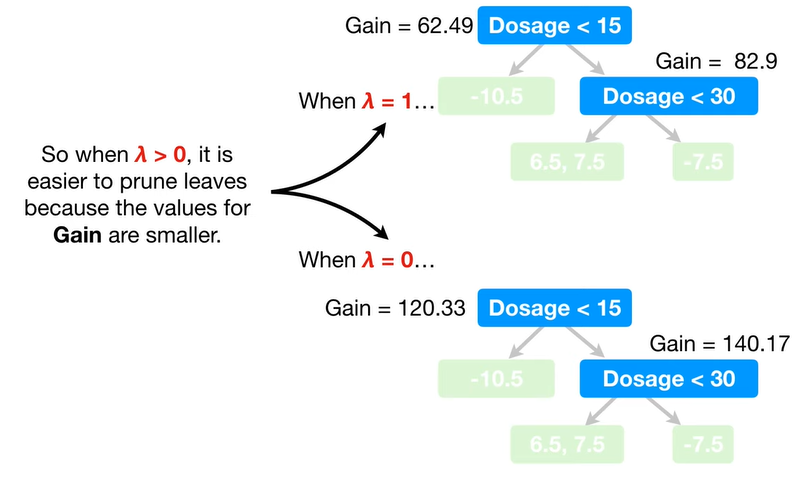
<div>
    
When $\gamma$ is larger than 0, it reduces the amount that an individual observation adds to the overall prediction.

#### 6) Calculate the _Output Values_ for the Tree
 
 $$Output Value = \frac{\sum Residuals}{n_{Residuals}+\lambda}$$
 
 
<div>
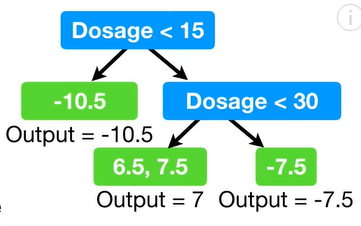
</div>

#### 7) With the tree being done, we make new predictions
 
Like Gradient Boost, XGB makes new predicitons by starting with the initial prediction and adding the output of the trees, scaled by a _learning Rate_
$\eta$ (default value = 0.3)
<div>
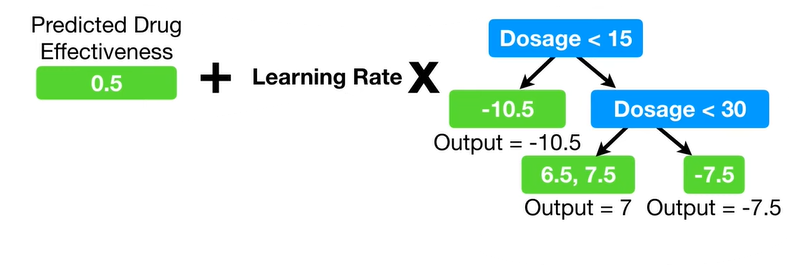
</div>

#### 8) And with the new predictions, we build new trees, until the residuals are small or the limit of built trees is reached out.

# XGBoost Trees for Classification

In [ ]:
<div><img src="attachment:image.png" width="150"></div>

<div>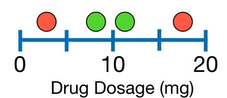</div>

#### 1) Like XGB for Regression, we make an initial prediction

<div>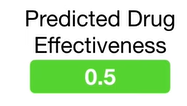</div>

Like for Regression, the standard value to use is 0.5 (in the classification case, however, this is a probability)

<div>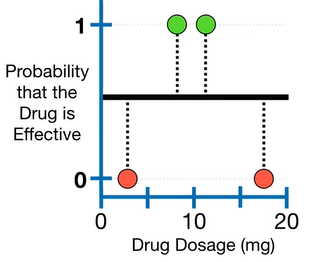</div>

#### 2) Now, like regression, we fit an XGBoost Tree to the residuals

We use a differente Similar Score thant regression: $$SimilarScore=\frac{(\sum Residual_i)^2}{\sum[PreviousProbability_i\times (1-PreviousProbability_i)]+\lambda}$$

again, $\lambda$ is the _Regularization Parameter_

Start the tree with a single leaf with all residuals 

<div>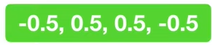</div>

And calculate its similarity score (in this case, it will be zero)



#### 3) Now, we decided if splitting the residuals into two groups does a better job clustering similar Residuals

Again, we keep finding thresholds between the averages of pairs of closest samples, Calculatinginding the Similarity Scores


#### 4) Then, we calculate the Total Gain $$Gain = Left_{Similarity} + Right_{Similarity} - Root_{Similarity}$$

And find the best threshold (if exists) for the next node.

#### The minimum number of Residuals allowed in each leaf is determined calculating _Cover_
$$Cover = \sum[PreviousProbability_i\times (1-PreviousProbability_i)] -\lambda$$

So, if the number of residuals in a leaf is less than the cover, the leaf is removed.

in Python: set the _min\_child\_weight_. For classification, start it with 0

<div>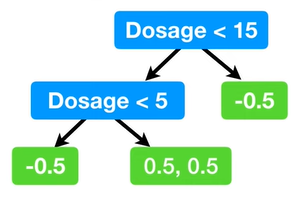</div>


#### 5) Prune the Tree

Again, we calculate $Gain - \gamma$, and if the difference is less than 0, we remove the branch.

#### 6) Calculate the Output Values for the leaves

$$OutputValue=\frac{\sum Residual_i}{\sum[PreviousProbability_i\times (1-PreviousProbability_i)]+\lambda}$$

#### 7) Make new Predictions

First, convet the initial prediction to log(odds) &rarr; <b>logit function</b>

$$log(odds)=log(\frac{p}{1-p})=log(\frac{0.5}{1-0.5})=0$$

<div>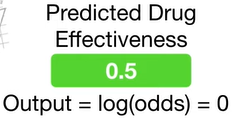</div>


and then we sum it to the scaled (by a leraning rate $\epsilon$) tree

<div>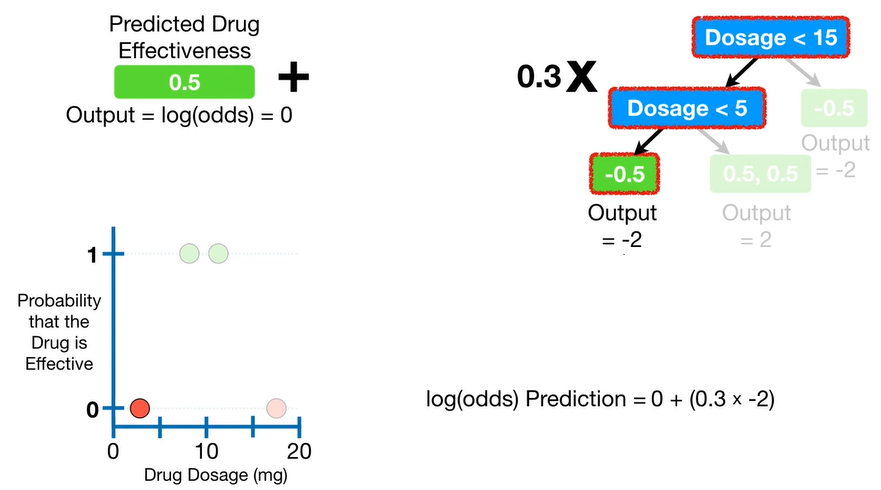</div>

And then convert the value to probability $$p = \frac{e^{log(odds)}}{1+e^(log(odds))}$$

<div>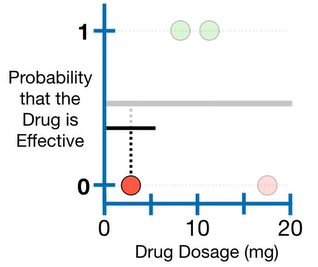</div>

And we get a new Residual, smaller thant before &rarr; small step into the right direction